
14. q23 current use ML y q5 puesto / q22 tamaño equipos 
¿En qué puestos se demanda el uso de ML?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = None


In [2]:
# Cargo el dataframe con fichero del total seleccionado

df = pd.read_csv('data_seleccionada.csv', index_col = 0)


In [3]:
# Hago un subset con las columnas que me interesan para responder a la pregunta
df2 = df[['q_5_role','q_15_years_using_ml', 'q_21_company_size', 'q_22_ds_team_size', 'q_23_current_use_of_ml']]
df2.head(15)

,q_5_role,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml
0,Other,5-10 years,50-249 employees,3-4,No (we do not use ML methods)
1,Program/Project Manager,< 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...
2,Software Engineer,I do not use machine learning methods,"1000-9,999 employees",0,I do not know
3,Research Scientist,5-10 years,"1000-9,999 employees",0,I do not know
4,Other,10-20 years,50-249 employees,5-9,We use ML methods for generating insights (but...
5,Currently not employed,< 1 year,NaN,NaN,NaN
6,Student,< 1 year,NaN,NaN,NaN
7,Data Scientist,2-3 years,"10,000 or more employees",3-4,"We have well established ML methods (i.e., mod..."
8,Currently not employed,< 1 year,NaN,NaN,NaN
9,Other,< 1 year,50-249 employees,1-2,I do not know


In [6]:
# Vamos a ver cuales son los roles más representados en este dataset
df2.groupby('q_5_role').count().sort_values(by='q_15_years_using_ml', ascending=False)

,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml
q_5_role,,,,
Student,6145,0,0,0
Data Scientist,3455,3436,3415,3370
Software Engineer,2325,2258,2238,2215
Data Analyst,2094,2171,2151,2114
Other,2030,2304,2285,2265
Currently not employed,1871,0,0,0
Research Scientist,1421,1473,1466,1456
Machine Learning Engineer,1403,1397,1382,1366
Business Analyst,811,921,913,908


In [7]:
# Voy a extraer un df para medir la experiecnia en funcion de los roles mas representados en nuestro estudio
df_roles = df2[df2['q_5_role'].isin(['Student', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer'])]


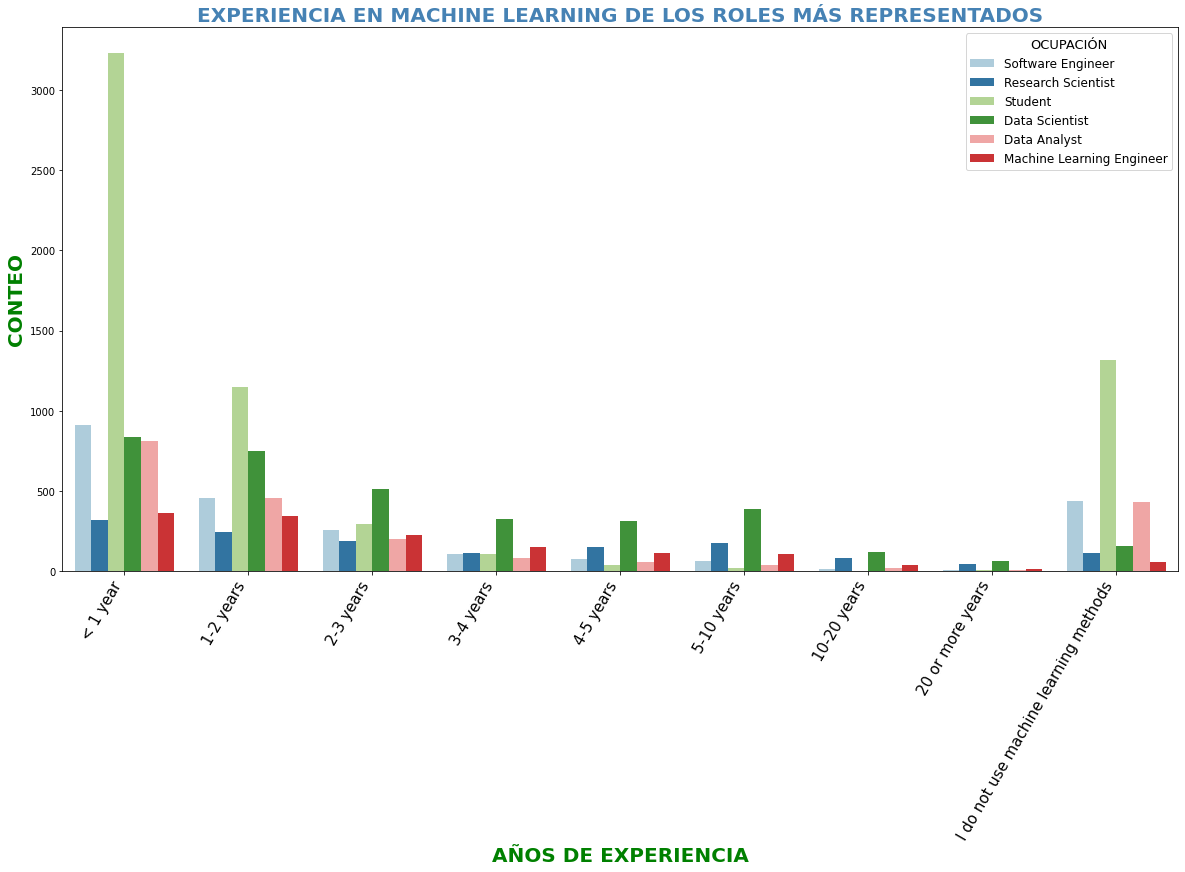

In [10]:
# Gráfica para visualizar la experiencia en ML por rol profesional
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df_roles, x = 'q_15_years_using_ml', hue = 'q_5_role', palette='Paired',
                    order=  ['< 1 year', '1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years', '20 or more years','I do not use machine learning methods'])
plt.title("EXPERIENCIA EN MACHINE LEARNING DE LOS ROLES MÁS REPRESENTADOS", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('AÑOS DE EXPERIENCIA', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':12}, loc='upper right')
legend.set_title ("OCUPACIÓN", prop = {'size': 13})
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)
plt.show();

In [11]:
# Volviendo a mi primer subset, voy a eliminar los "students" y "currently not employed" porque no aportan información sobre en qué puestos de trabajo se demanda más el uso de ML

# Filtro y extraigo los indices de la filas que quiero eliminar
df2[df2['q_5_role'].isin(['Student', 'Currently not employed'])].shape

(8790, 5)

In [12]:
indices = list(df2[df2['q_5_role'].isin(['Student', 'Currently not employed'])].index)

In [13]:
df2.drop(index=indices, inplace=True)

/tmp/ipykernel_2177/4191565734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(index=indices, inplace=True)


In [14]:
# Vemos qué valores únicos hay en el primer subset
df2['q_5_role'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

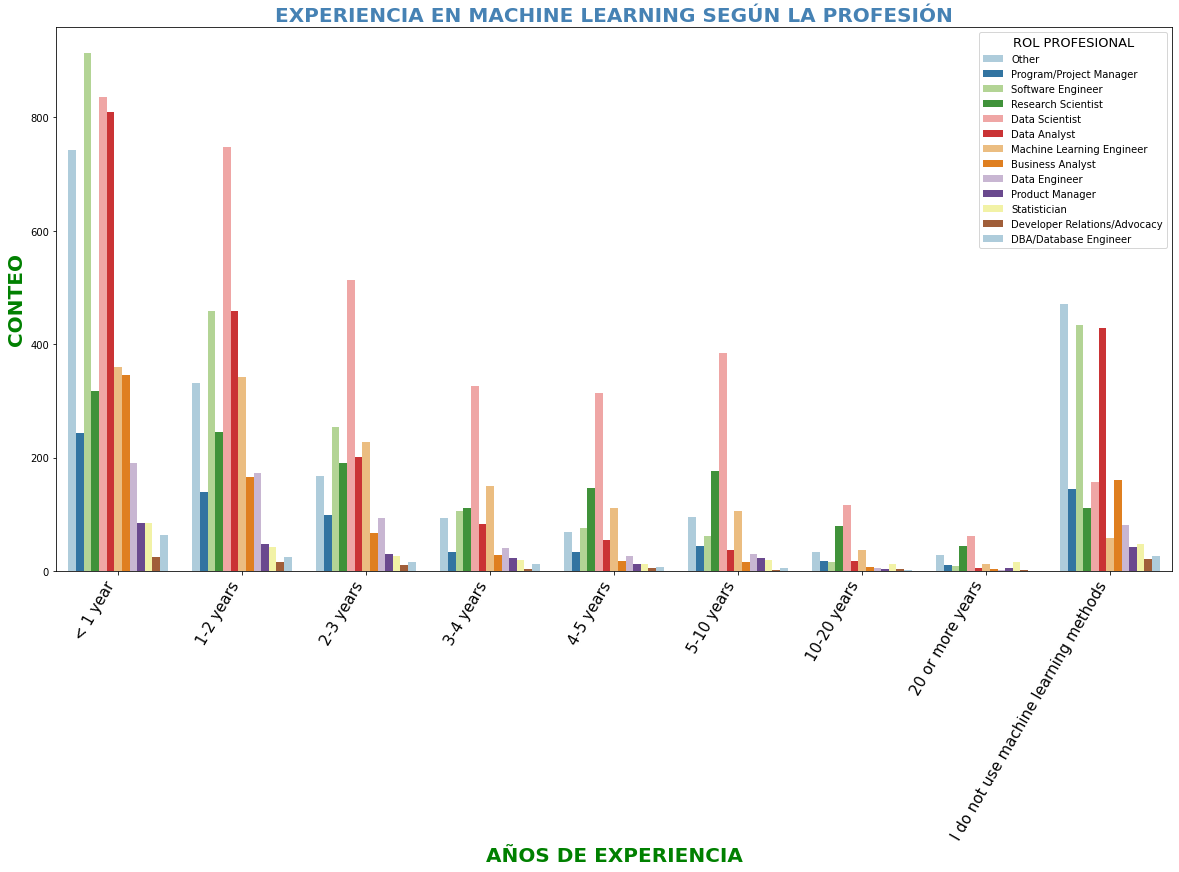

In [16]:
# Gráfico con todos los roles profesionales
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df2, x = 'q_15_years_using_ml', hue = 'q_5_role', palette='Paired',
                    order=['< 1 year', '1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years', '20 or more years','I do not use machine learning methods'])
plt.title("EXPERIENCIA EN MACHINE LEARNING SEGÚN LA PROFESIÓN", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('AÑOS DE EXPERIENCIA', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':10}, loc='upper right')
legend.set_title ("ROL PROFESIONAL", prop = {'size': 13})
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show(); 

In [17]:
# Se ve también en una tabla de frecuencias entre "role" y "years using ml"

crosstab = pd.crosstab(index = [df2['q_5_role']], columns= [df2['q_15_years_using_ml']])
crosstab

q_15_years_using_ml,1-2 years,10-20 years,2-3 years,20 or more years,3-4 years,4-5 years,5-10 years,< 1 year,I do not use machine learning methods
q_5_role,,,,,,,,,
Business Analyst,166,7,67,3,29,18,15,345,161
DBA/Database Engineer,24,1,15,0,12,7,5,63,27
Data Analyst,458,17,201,5,83,55,37,810,428
Data Engineer,172,6,94,1,40,26,30,190,81
Data Scientist,748,117,513,62,326,314,384,835,156
Developer Relations/Advocacy,16,3,10,2,4,6,2,24,21
Machine Learning Engineer,342,37,227,13,149,111,106,360,58
Other,331,34,168,29,93,68,95,742,470
Product Manager,47,3,30,5,22,12,23,84,43


> * Los que tienen más experiencia en ML son los data scientists
> * Lo más común es tener 2-3 años de experiencia en ML, y son los data scientists quienes lo tienen
> * Los ML engineer no son los que máx experiencia tienen en ml, la mayoria llevan de 0 a dos años o de dos a tres años
> * Son los data analysts, data scientists y software engineers que se estan "poniendo las pilas" con esto del ml, que llevan menos de un año usando ml, seguidos por los ml engineers y business analysts
> * Un bootcamp de ML podría ser una buena opción como continuación de DA
> * Siguiente pregunta relacionada con la 13:

* ¿Son los bootcamps elegidos como forma de aprender por los DA, DS y SE? Ellos son los que más estan ´pujando` por aprender ML

In [18]:
# Me saco las columans relacionadas con la pregunta 13 y selecciono las filas que tienen los puestos anteriores, inclutendo a ml engineer y research scientist, que son los que mas usan ml

df13 = df.loc[df['q_5_role'].isin(['Data Analyst', 'Data Scientist', 'Software Engineer', 'Machine Learning Engineer', 'Research Scientist']) , ['q_5_role','q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11']]
df13.head()

,q_5_role,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
2,Software Engineer,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Research Scientist,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data Scientist,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,LinkedIn Learning,NaN,NaN,NaN
15,Research Scientist,Coursera,NaN,NaN,NaN,NaN,Udacity,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN
16,Data Analyst,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",NaN,NaN


In [19]:
# compruebo los uniques y los value counts antes y despues para ver si los cogió todos
df['q_5_role'].value_counts()


Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: q_5_role, dtype: int64

In [20]:
df13['q_5_role'].value_counts()

Data Scientist               3616
Software Engineer            2449
Data Analyst                 2301
Research Scientist           1538
Machine Learning Engineer    1499
Name: q_5_role, dtype: int64

In [16]:
# Guay, esta todo

In [21]:
df13.describe().T

,count,unique,top,freq
q_5_role,11403,5,Data Scientist,3616
q40_part_1,4789,1,Coursera,4789
q40_part_2,1485,1,edX,1485
q40_part_3,3844,1,Kaggle Learn Courses,3844
q40_part_4,1993,1,DataCamp,1993
q40_part_5,639,1,Fast.ai,639
q40_part_6,1542,1,Udacity,1542
q40_part_7,3231,1,Udemy,3231
q40_part_8,1329,1,LinkedIn Learning,1329
q40_part_9,861,1,"Cloud-certification programs (direct from AWS,...",861


In [22]:
# Vemos la tabla de frecuencias solo para los rles seleccionados
frecuencia_courses = df13.groupby('q_5_role').count()
frecuencia_courses

,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
q_5_role,,,,,,,,,,,
Data Analyst,892,308,818,543,60,269,714,367,149,371,139
Data Scientist,1710,519,1155,800,233,524,1094,451,342,891,206
Machine Learning Engineer,636,155,454,189,137,253,363,163,130,373,120
Research Scientist,656,238,517,206,80,173,359,115,57,390,155
Software Engineer,895,265,900,255,129,323,701,233,183,378,176


In [23]:
# Renombramos para saber qué columna es cual
lista_nuevas_cols = list(df13.describe().T['top'].values)

In [24]:
lista_nuevas_cols

['Data Scientist',
 'Coursera',
 'edX',
 'Kaggle Learn Courses',
 'DataCamp',
 'Fast.ai',
 'Udacity',
 'Udemy',
 'LinkedIn Learning',
 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 'University Courses (resulting in a university degree)',
 'None']

In [25]:
# Eliminamos este elemento de la lista de columnas
lista_nuevas_cols.pop(0)

'Data Scientist'

In [26]:
lista_nuevas_cols

['Coursera',
 'edX',
 'Kaggle Learn Courses',
 'DataCamp',
 'Fast.ai',
 'Udacity',
 'Udemy',
 'LinkedIn Learning',
 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 'University Courses (resulting in a university degree)',
 'None']

In [27]:
antiguas_cols = list(frecuencia_courses.columns)
antiguas_cols

['q40_part_1',
 'q40_part_2',
 'q40_part_3',
 'q40_part_4',
 'q40_part_5',
 'q40_part_6',
 'q40_part_7',
 'q40_part_8',
 'q40_part_9',
 'q40_part_10',
 'q40_part_11']

In [28]:
dict_rename = dict(zip(antiguas_cols, lista_nuevas_cols))

In [29]:
# Tabla de frecuencias renombrada
frecuencia_courses.rename(columns=dict_rename, inplace=True )
frecuencia_courses

,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",University Courses (resulting in a university degree),None
q_5_role,,,,,,,,,,,
Data Analyst,892,308,818,543,60,269,714,367,149,371,139
Data Scientist,1710,519,1155,800,233,524,1094,451,342,891,206
Machine Learning Engineer,636,155,454,189,137,253,363,163,130,373,120
Research Scientist,656,238,517,206,80,173,359,115,57,390,155
Software Engineer,895,265,900,255,129,323,701,233,183,378,176


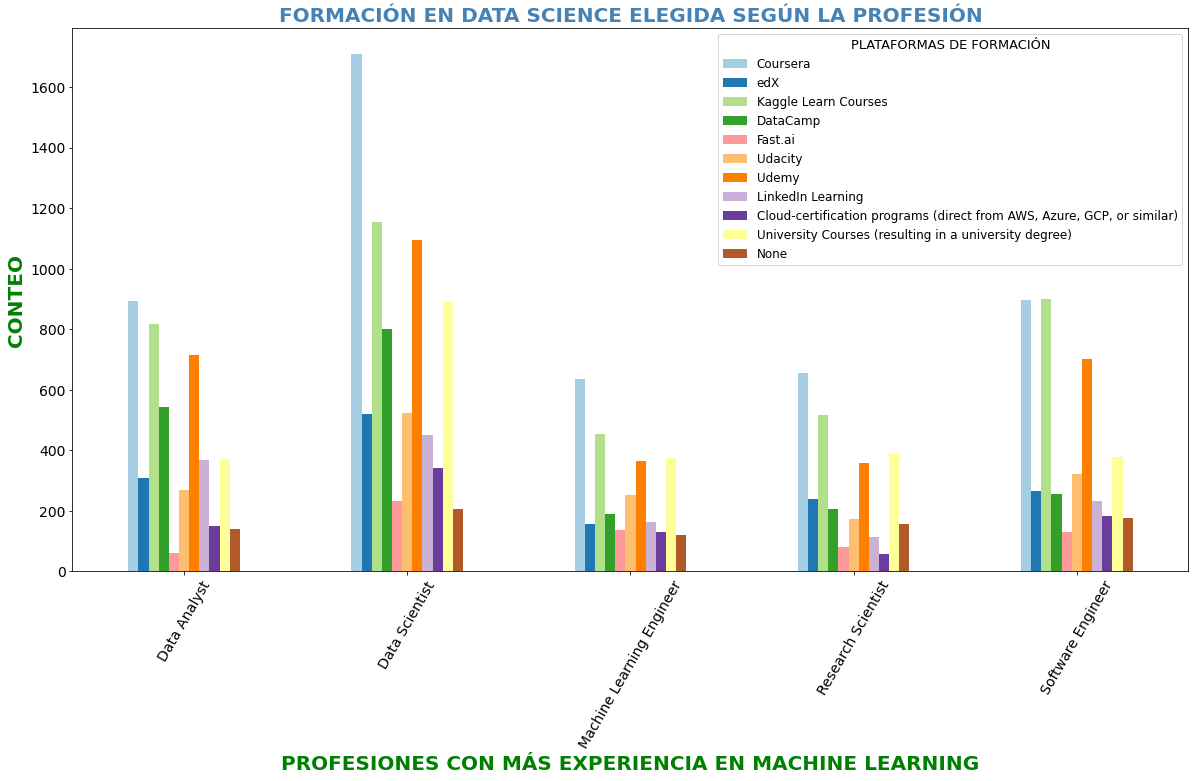

In [30]:
# Gráfico para ver la formación elegida según la profesión
fig, eje = plt.subplots()
frecuencia_courses.plot.bar(figsize=(20,10), ax=eje, legend=True, fontsize = 14, rot=60, colormap='Paired')
plt.title("FORMACIÓN EN DATA SCIENCE ELEGIDA SEGÚN LA PROFESIÓN",fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('PROFESIONES CON MÁS EXPERIENCIA EN MACHINE LEARNING', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':12}, loc='upper right')
legend.set_title ("PLATAFORMAS DE FORMACIÓN", prop = {'size': 13});

> - Vemos que los tipos de cursos más elegidos son (por orden):
>    - Coursera
>    - Kaggel Learn
>    - Udemy
>    - Datacamp (para los DA y DS)
>    - University (para los ML, RS y SE)
> - Aunque no es puntera, es mucho más clara la tendencia de hacer bootcamps entre los DA y DS

##### Comprobación adicional: ¿que estudios tienen los perfiles que más experiencia tienen en ML?

In [31]:
# Esta pregunta no esta en el archivo de data_seleccionada, por lo que hay que buscarla y traerla aquí
dfq4=pd.read_csv('../../HU1-Conversión-csv-y-Unión/data/data_txt_clean.txt', sep=';')

estudios = dfq4['Q4'].reset_index()

In [32]:
estudios.head(2)

,index,Q4
0,0,Bachelor’s degree
1,1,Master’s degree


In [37]:
estudios.shape

(25973, 2)

In [36]:
# Hago un nuevo subset con todos los roles profesionales para poder añadir la columna q4
df3 = df[['q_5_role','q_15_years_using_ml', 'q_21_company_size', 'q_22_ds_team_size', 'q_23_current_use_of_ml']]
df3.shape

(25973, 5)

In [38]:
# Reseteo index para hacer un merge con la pregunta q4
df3.reset_index(inplace=True)
df3.head(2)

,index,q_5_role,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml
0,0,Other,5-10 years,50-249 employees,3-4,No (we do not use ML methods)
1,1,Program/Project Manager,< 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...


In [39]:
# Mergeo ambos dataframes
df_est = pd.merge(df3,estudios, on='index')
df_est.head()

,index,q_5_role,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,Q4
0,0,Other,5-10 years,50-249 employees,3-4,No (we do not use ML methods),Bachelor’s degree
1,1,Program/Project Manager,< 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Master’s degree
2,2,Software Engineer,I do not use machine learning methods,"1000-9,999 employees",0,I do not know,Master’s degree
3,3,Research Scientist,5-10 years,"1000-9,999 employees",0,I do not know,Doctoral degree
4,4,Other,10-20 years,50-249 employees,5-9,We use ML methods for generating insights (but...,Doctoral degree


In [40]:
# Selecciono solo las columnas que me interesan
df_est = df_est[['q_5_role', 'Q4']]

In [41]:
# Renombro las columnas
df_est.columns =['professional_role', 'level_of_education']

In [42]:
# Selecciono los roles profesionales relevantes y descarto los niveles de estudios que no aportan información relevante
df_est = df_est[(df_est['professional_role'].isin(['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Software Engineer', 'Research Scientist'])) & 
                (~df_est['level_of_education'].isin(['I prefer not to answer']))]

In [43]:
# Vemos los valores unicos de este subset
df_est['professional_role'].unique()

array(['Software Engineer', 'Research Scientist', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer'], dtype=object)

In [44]:
df_est['level_of_education'].unique()

array(['Master’s degree', 'Doctoral degree', 'Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [45]:
# Vamos a limpiar un poco los valores para que sea más legible en la gráfica
map = {'Master’s degree':'Master’s degree',
       'Doctoral degree':'Doctoral degree', 
       'Bachelor’s degree' :'Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree':'Under Bachelor’s degree',
       'No formal education past high school':'High School', 
       'Professional doctorate':'Professional doctorate' }

In [46]:
# Aplicamos el mapeo
df_est['level_of_education'] = df_est['level_of_education'].map(map)

In [47]:
df_est['level_of_education'].unique()

array(['Master’s degree', 'Doctoral degree', 'Bachelor’s degree',
       'Under Bachelor’s degree', 'High School', 'Professional doctorate'],
      dtype=object)

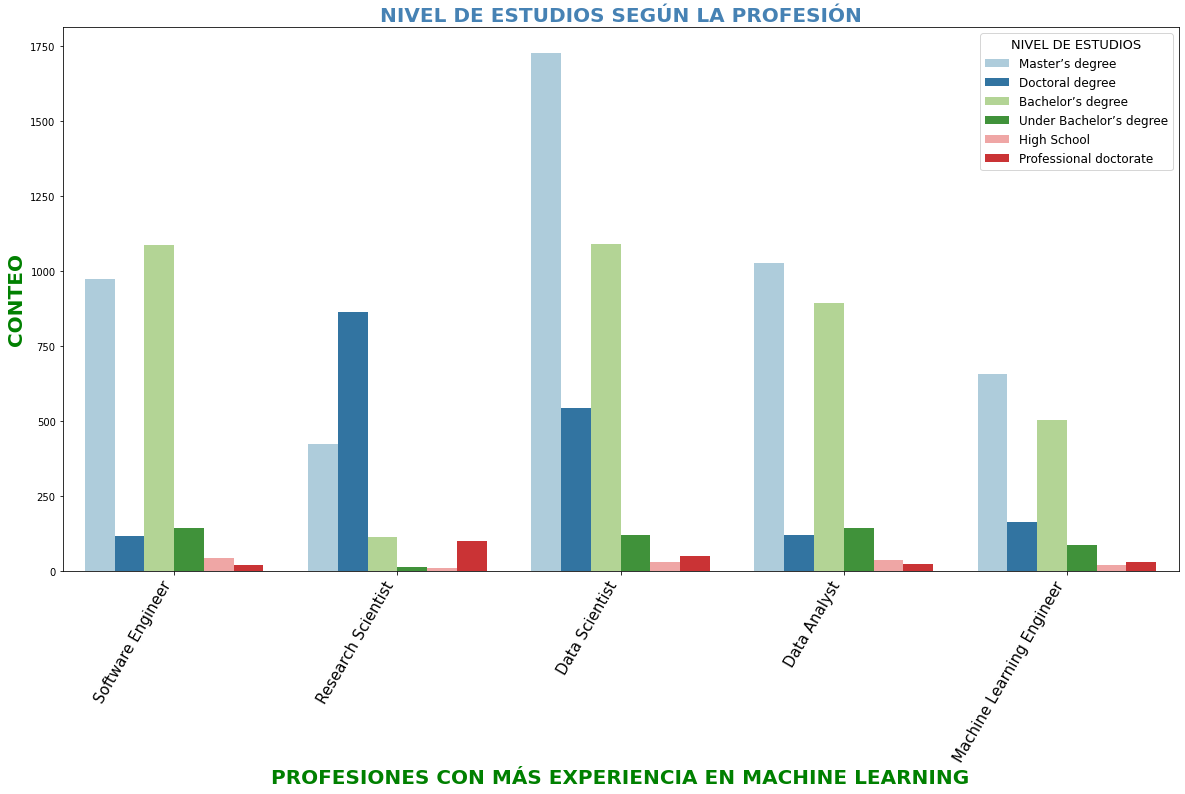

In [48]:
# Gráfica para ver el nivel de estudios según la profesión
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df_est, x = 'professional_role', hue = 'level_of_education', palette='Paired')
plt.title("NIVEL DE ESTUDIOS SEGÚN LA PROFESIÓN", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('PROFESIONES CON MÁS EXPERIENCIA EN MACHINE LEARNING', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':12}, loc='upper right')
legend.set_title ("NIVEL DE ESTUDIOS", prop = {'size': 13})
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show(); 

#### Comprobación: Roles más representados en nuestros datos

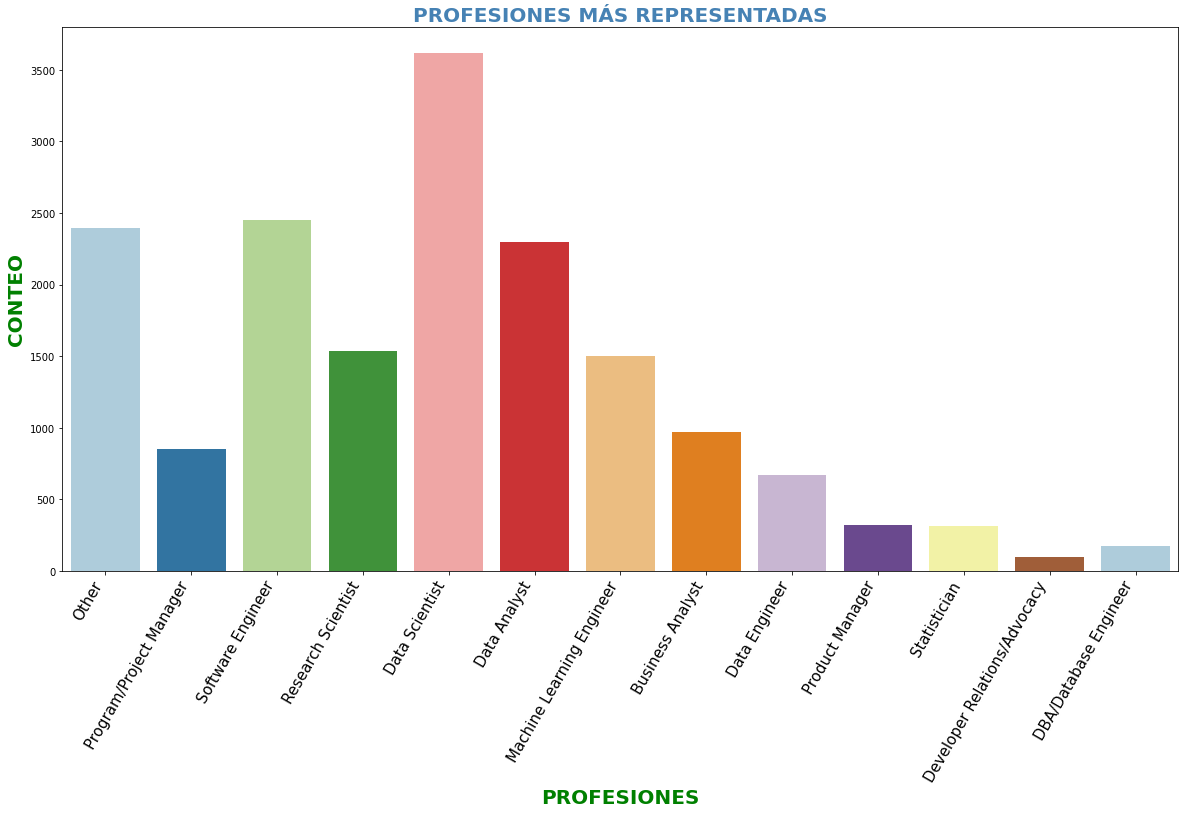

In [49]:
# Gráfica para visualizar rápidamente las profesiones más representadas en nuestros datos
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df2, x = 'q_5_role', palette='Paired')
plt.title("PROFESIONES MÁS REPRESENTADAS", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('PROFESIONES', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show(); 

#### Comprobacion: ¿Los students qué estudian, o qué experiencia tienen en ML?

In [50]:
# Vemos qué columnas nos interesan para un nuevo subset
df3.columns

Index(['index', 'q_5_role', 'q_15_years_using_ml', 'q_21_company_size',
       'q_22_ds_team_size', 'q_23_current_use_of_ml'],
      dtype='object')

In [55]:
# Filtramos por los registros que sean estudiantes
df_students = df3[df3['q_5_role'] == 'Student']

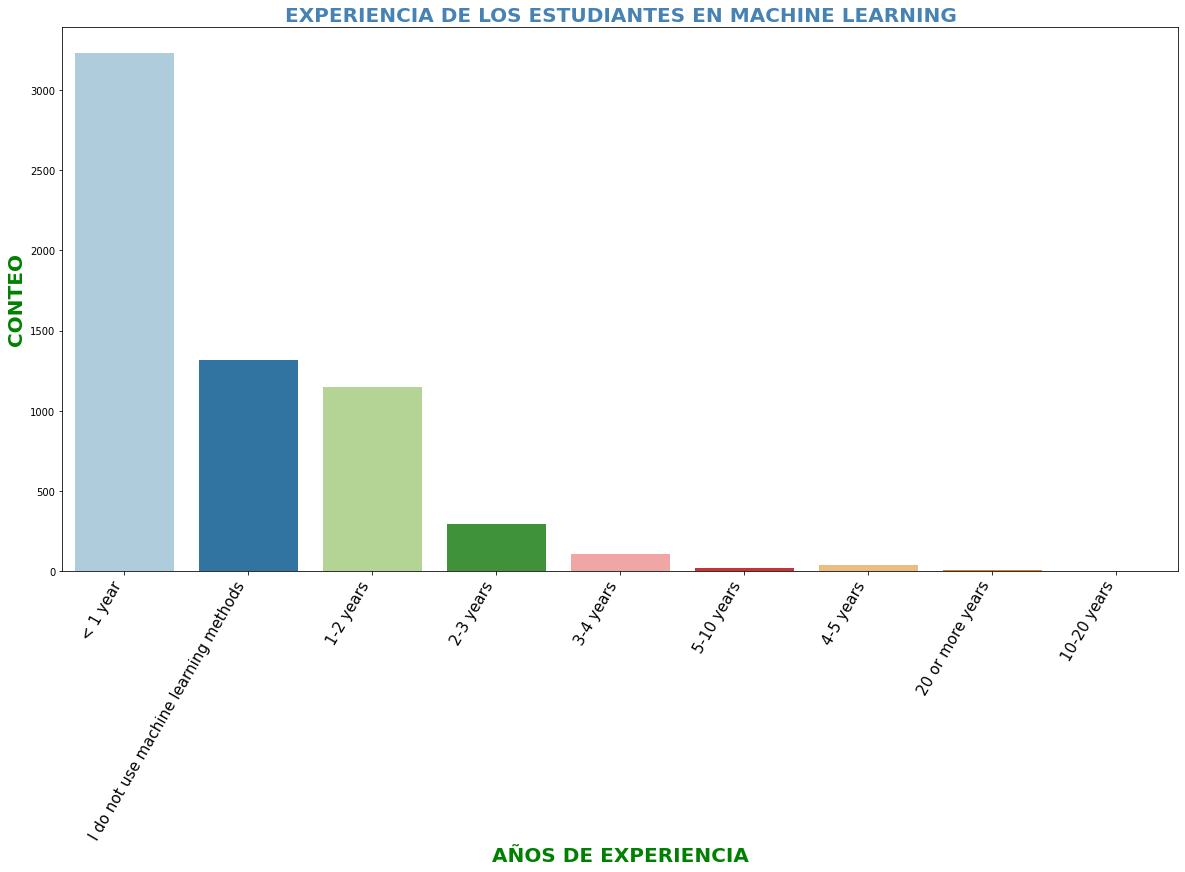

In [57]:
# Gráfica para visualizar la experiencia de los estudiantes en ML
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df_students, x = 'q_15_years_using_ml', palette='Paired')
plt.title("EXPERIENCIA DE LOS ESTUDIANTES EN MACHINE LEARNING", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('AÑOS DE EXPERIENCIA', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)

plt.show(); 

> * Vemos que la mayoría de estudiantes tienen menos de un año de experiencia, por lo cual han aprendido hace poco
> * Esto puede significar que hay una tendencia a saber machine learning si te dedicas a algo ralacionado con data science

In [58]:
# Lo vemos tambien en un piechart haciendo un value_counts()
st_exp = df_students['q_15_years_using_ml'].value_counts()

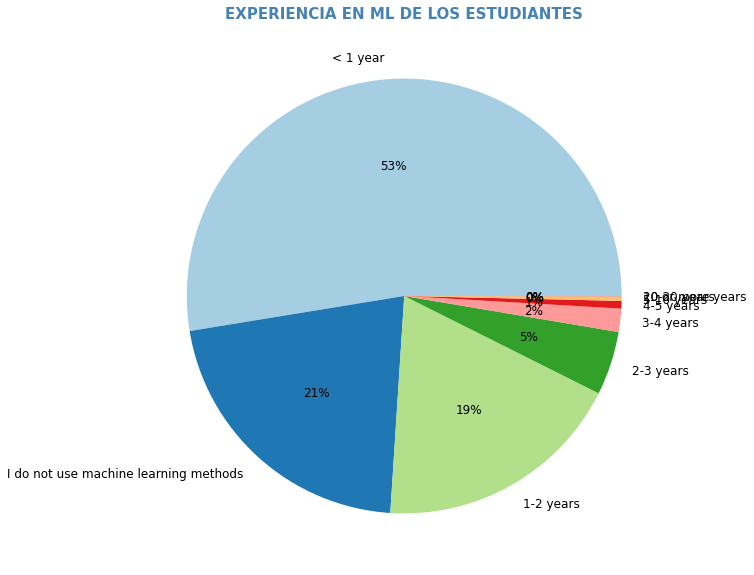

In [59]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('Paired')
plt.pie(x=st_exp.values, labels = st_exp.index, textprops={'fontsize': 12},wedgeprops={'linewidth':50}, colors = colors, autopct='%.0f%%')
plt.title('EXPERIENCIA EN ML DE LOS ESTUDIANTES', fontsize = 15, color = 'Steelblue', fontweight = 'bold')
plt.show();

### Qué plataformas de formación eligen los estudiantes  y desempleados?

In [60]:
# Nuevo subset
df_st = df.loc[df['q_5_role'].isin(['Student', 'Currently not employed']) , ['q_5_role','q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11']]
df_st.head()

,q_5_role,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
5,Currently not employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",NaN,NaN
6,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Currently not employed,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Student,Coursera,edX,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Rescato este diccionario
dict_rename

{'q40_part_1': 'Coursera',
 'q40_part_2': 'edX',
 'q40_part_3': 'Kaggle Learn Courses',
 'q40_part_4': 'DataCamp',
 'q40_part_5': 'Fast.ai',
 'q40_part_6': 'Udacity',
 'q40_part_7': 'Udemy',
 'q40_part_8': 'LinkedIn Learning',
 'q40_part_9': 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 'q40_part_10': 'University Courses (resulting in a university degree)',
 'q40_part_11': 'None'}

In [62]:
# Acorto los dos últimos
dict_rename['q40_part_9'] = 'Cloud-certification programs'
dict_rename['q40_part_10'] = 'University Courses for a degree'

In [63]:
# Renombro las columnas
df_st.rename(columns=dict_rename, inplace=True)

In [64]:
# Vamos a ver una tablade frecuencias rápida
student_training = df_st.groupby('q_5_role').count()
student_training

,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,Cloud-certification programs,University Courses for a degree,None
q_5_role,,,,,,,,,,,
Currently not employed,673,234,814,292,61,189,431,190,138,230,101
Student,2029,532,1961,767,220,499,1217,504,395,1332,383


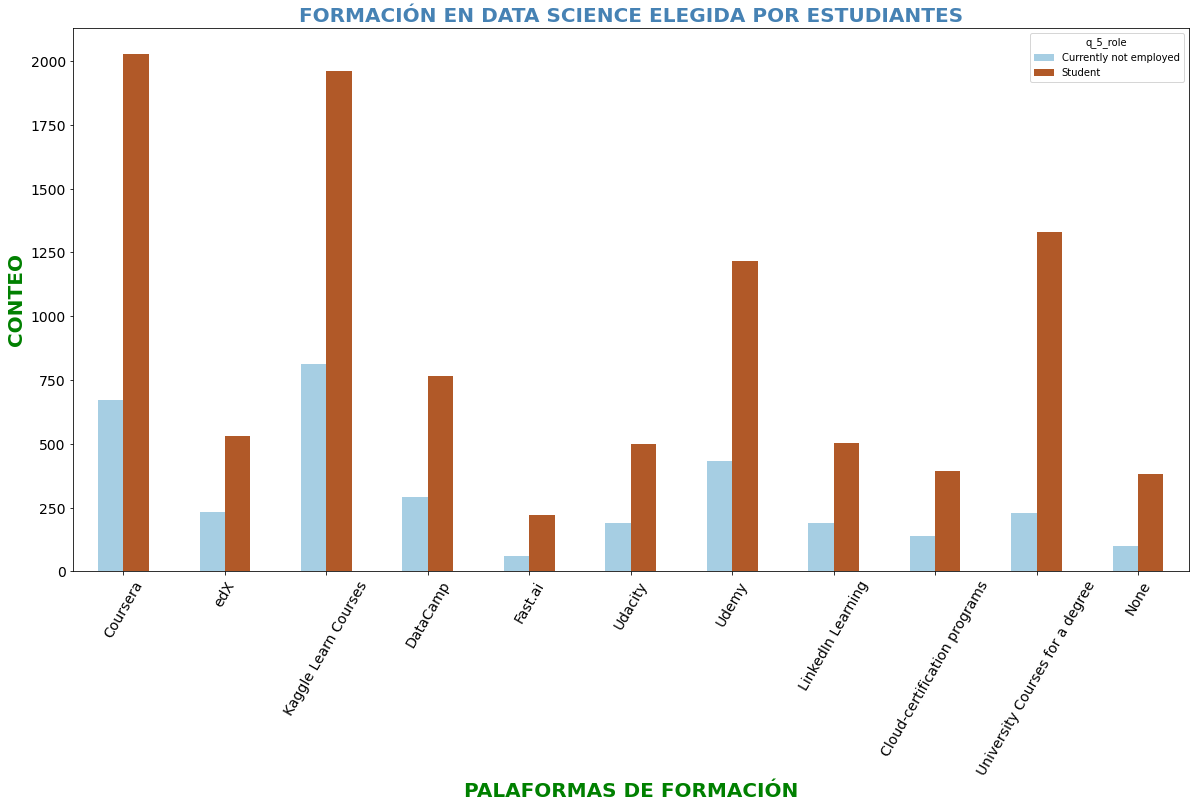

In [65]:
# Vamos a plotearlo para visualizarlo mejor
fig, eje = plt.subplots()
student_training.T.plot.bar( figsize=(20,10), ax=eje, fontsize = 14, rot=60, colormap='Paired')
plt.title("FORMACIÓN EN DATA SCIENCE ELEGIDA POR ESTUDIANTES",fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('PALAFORMAS DE FORMACIÓN', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.show();


> * Vemos que la elección de cursos es similar en estudiantes y desempleados que en los demás roles profesionales